In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data=sns.load_dataset('titanic')

In [9]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
data.drop(['sibsp','parch','embarked','class','who','adult_male','deck','embark_town','alive','alone'],axis='columns', inplace=True)

In [11]:
data.head()

,survived,pclass,sex,age,fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [12]:
data.value_counts('sex')

sex
male      577
female    314
dtype: int64

In [13]:
data.isnull().sum()

survived      0
pclass        0
sex           0
age         177
fare          0
dtype: int64

In [14]:
data.isnull().sum()['age']/len(data)*100

19.865319865319865

<AxesSubplot:>

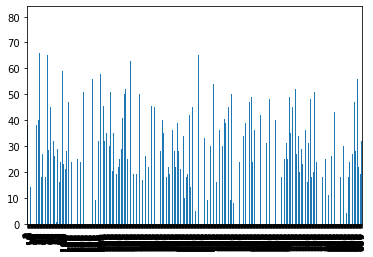

In [19]:
data['age'].plot(kind='bar')

<BarContainer object of 891 artists>

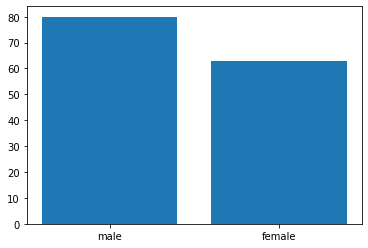

In [21]:
plt.bar(data['sex'], data['age'])

In [23]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='age', ylabel='Density'>

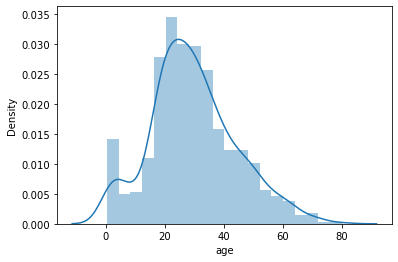

In [24]:
sns.distplot(data['age'])

In [26]:
data.corr()['survived']

survived    1.000000
pclass     -0.338481
age        -0.077221
fare        0.257307
Name: survived, dtype: float64

In [27]:
data.describe()

,survived,pclass,age,fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,14.526497,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,20.125000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,38.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


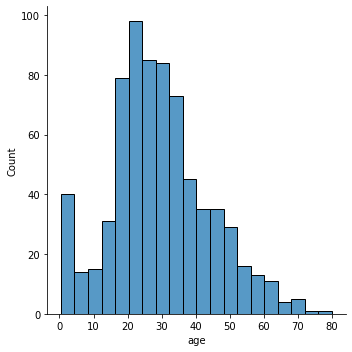

In [28]:
sns.displot(data['age'])

<AxesSubplot:xlabel='age'>

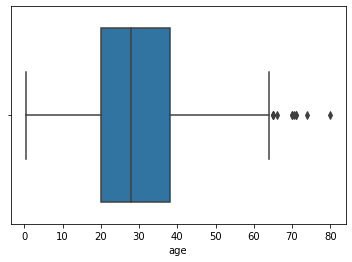

In [30]:
sns.boxplot(data['age'])

<AxesSubplot:xlabel='survived', ylabel='age'>

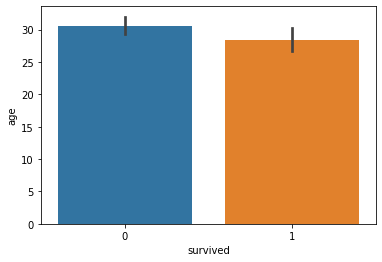

In [31]:
sns.barplot(x='survived',y='age', data=data)

<AxesSubplot:xlabel='sex', ylabel='age'>

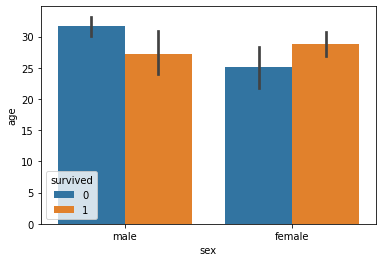

In [43]:
sns.barplot(x='sex',y='age',hue='survived', data=data)

for male, the number of 

<AxesSubplot:xlabel='sex', ylabel='count'>

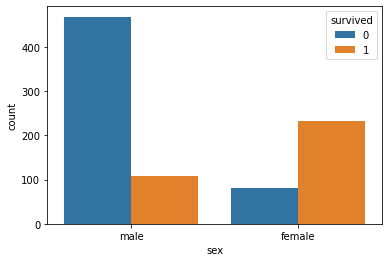

In [37]:
sns.countplot(x='sex', data=data, hue='survived')

for male, the number of people that did not survive is more than  survive

whhile for female, the number of people that survived is more than the number of people that did not survive

<AxesSubplot:xlabel='sex', ylabel='count'>

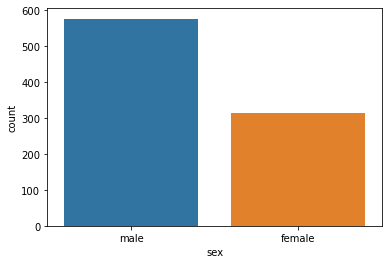

In [39]:
sns.countplot(x='sex', data=data)

the number of male is more than the number of female

In [44]:
data.head()

,survived,pclass,sex,age,fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


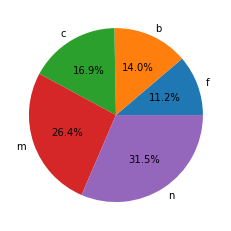

In [50]:
plt.pie(x=[20,25,30,47,56], labels=['f','b','c','m','n'], autopct='%1.1f%%')
plt.show()

In [57]:
x=data.iloc[0:3,[1]].values

In [61]:
flat=x.flatten()

In [63]:
flat

array([3, 1, 3], dtype=int64)

In [66]:
label=data.iloc[0:3,[2]].values

In [70]:
label=label.flatten()

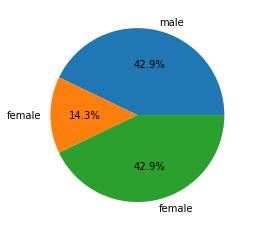

In [71]:
plt.pie(x=flat, labels=label, autopct='%1.1f%%')
plt.show()

In [72]:
data.dtypes

survived      int64
pclass        int64
sex          object
age         float64
fare        float64
dtype: object

In [73]:
dummy=pd.get_dummies(data.sex)

In [74]:
dummy.head(3)

,female,male
0,0,1
1,1,0
2,1,0


In [75]:
new_data=pd.concat([data,dummy],axis='columns')

In [76]:
new_data.head()

,survived,pclass,sex,age,fare,female,male
0,0,3,male,22.0,7.2500,0,1
1,1,1,female,38.0,71.2833,1,0
2,1,3,female,26.0,7.9250,1,0
3,1,1,female,35.0,53.1000,1,0
4,0,3,male,35.0,8.0500,0,1


In [77]:
new_data.drop(columns='sex', axis=1, inplace=True)

In [78]:
new_data.columns

Index(['survived', 'pclass', 'age', 'fare', 'female', 'male'], dtype='object')

In [79]:
new_data.dtypes

survived      int64
pclass        int64
age         float64
fare        float64
female        uint8
male          uint8
dtype: object

In [80]:
new_data.duplicated().any()

True

In [89]:
duplicate=new_data[new_data.duplicated()].index

In [90]:
for index in duplicate:
    new_data.drop(index,axis=0, inplace=True)

In [92]:
new_data.duplicated().any()

False

In [94]:
new_data.shape

(768, 6)

In [101]:
new_data.isnull().sum()

survived     0
pclass       0
age         98
fare         0
female       0
male         0
dtype: int64

In [96]:
new_data['age'].median()

28.25

In [102]:
new_data.fillna(28.25, inplace=True)

In [103]:
new_data.isnull().sum()

survived    0
pclass      0
age         0
fare        0
female      0
male        0
dtype: int64

In [104]:
new_data.describe()

,survived,pclass,age,fare,female,male
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.415365,2.238281,29.623594,35.068885,0.375000,0.625000
std,0.493106,0.857055,13.782584,52.587085,0.484438,0.484438
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,8.050000,0.000000,0.000000
50%,0.000000,3.000000,28.250000,16.050000,0.000000,1.000000
75%,1.000000,3.000000,36.000000,34.375000,1.000000,1.000000
max,1.000000,3.000000,80.000000,512.329200,1.000000,1.000000


In [106]:
X=new_data.drop('survived',axis=1).values

In [108]:
type(X)

numpy.ndarray

In [109]:
X.shape

(768, 5)

In [110]:
y=new_data['survived'].values

In [111]:
y.shape

(768,)

In [112]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [113]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,stratify=y)

In [114]:
print(X_train.shape, X_test.shape)

(614, 5) (154, 5)


In [115]:
scaler=StandardScaler()

In [116]:
X_train.std()

28.79136419734066

In [117]:
X_train=scaler.fit_transform(X_train)

In [118]:
X_train.std()

1.0000000000000016

In [119]:
X_train

array([[-0.30808277,  0.32778886, -0.39481618, -0.79833159,  0.79833159],
       [ 0.86684158, -0.74739567, -0.48814237, -0.79833159,  0.79833159],
       [ 0.86684158, -1.89425916, -0.24257194,  1.25261233, -1.25261233],
       ...,
       [ 0.86684158, -2.03761709, -0.34312479,  1.25261233, -1.25261233],
       [-0.30808277, -0.38900083,  0.58558016,  1.25261233, -1.25261233],
       [ 0.86684158, -0.08436521, -0.33636948,  1.25261233, -1.25261233]])

In [120]:
X_test=scaler.transform(X_test)

In [121]:
X_test.std()

0.9716472793007767

In [122]:
model=DecisionTreeClassifier()

In [123]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [124]:
model.predict(X_test)

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [125]:
model.score(X_test,y_test)

0.7207792207792207